Title: Logistic Regression and Gradient Descent
Author: Thomas Breuel
Institution: UniKL

In [3]:

import scipy,pylab,numpy
from numpy import *
from scipy import *
from pylab import *
from urllib import urlopen
from gzip import GzipFile
from scipy.spatial import distance
from scipy.spatial.distance import cdist

Linear Classification Problem
================

Let's generate a linear problem, as before.

440 560


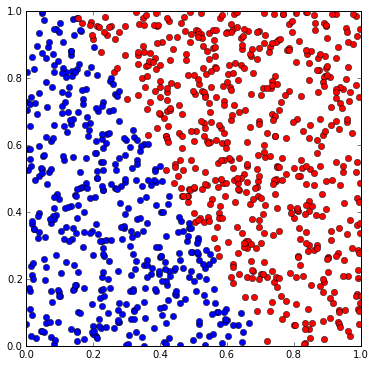

In [1]:
data = random_sample((1000,2))
labels = (data[:,0]*0.7+data[:,1]*0.4>0.5)
d0 = data[labels==False]
d1 = data[labels]
figure(figsize=(6,6))
plot(d0[:,0],d0[:,1],"bo")
plot(d1[:,0],d1[:,1],"ro")
print len(d0),len(d1)

In [2]:
augmented = concatenate([ones((len(data),1)),data],axis=1)
augmented[:3,:]

array([[ 1.        ,  0.52174249,  0.93138903],
       [ 1.        ,  0.80899277,  0.6778396 ],
       [ 1.        ,  0.3524324 ,  0.24216655]])

# Sigmoid Functions

We have considered two ways of finding discriminant functions so far:

- perceptrons: $H(w\cdot x)$, via the perceptron criterion function
- linear: $w\cdot x$, via least square regression

Advantage: both have simple algorithms to compute the weight vector

Disadvantage: the weight vectors aren't very good (at least in the non-separable case)

(gradient descent)

Let's consider a general class of predictors of class labels $f_\theta(x)$, parameterized by some parameter vector $\theta$, with a least square error measure:

$$\hbox{error} = E(\theta) = \sum_i (f_\theta(x_i) - c_i)^2$$

This is a _least mean square_ error (LMS) error function.

We can optimize these via _gradient descent_. That is, we want to find $\hat\theta$ such that:

$$ \nabla E(\hat\theta) = 0 $$

The set of all such points constitutes local maxima/minima.

The way we find such local minima is iteratively:

$$ \theta_{i+1} = \theta_i - \nabla E(\theta_i) $$

(error gradient descent)

By the chain rule, we can compute this gradient:

$$ \nabla E(\theta) = \sum_i 2 (f_\theta(x_i) - c_i) \nabla_{\theta} f_\theta(x_i) $$

Putting this together with the previous equation gives us an iterative scheme for finding local minima of the error.

A necessary condition for this to work is for the function $f$ to be differentiable in $\theta$.

(smoothed Heaviside function)

To make $f$ differentiable, we replace the Heaviside function with a smooth approximation in the form of the _logistic function_, a kind of _sigmoid function_:

$$\sigma_q(x) = \frac{1}{1+e^{-q\\,x}}$$

We will see later that this function has other nice properties.

This function looks non-symetrical, but it actually is.  Let's plot it.

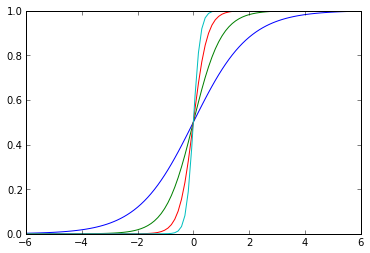

In [3]:
import matplotlib.pyplot as plt
xs = linspace(-6,6,100)
def sig(x,q): return 1.0/(1.0+exp(-q*x))
plot(xs,sig(xs,1.0)); plot(xs,sig(xs,2.0)); plot(xs,sig(xs,4.0)); plot(xs,sig(xs,8.0))

(derivation of the gradient)

Using the sigmoid function, the discriminant functions become:

$$g_c(x) = \sigma(w_c \cdot x)$$

As before, we compute the gradient of the error:

$$\hbox{err} = \sum_i (\sigma(w\cdot x_i)-c_i)^2$$

Expanding this yields:

$$\nabla_w \hbox{err} = 2 \sum_i (\sigma(w\cdot x_i)-c_i) \sigma'(w\cdot x_i) x_i$$

Note that

$$\sigma'(x) = \sigma(x) (1-\sigma(x))$$



Let's implement this.  Note that the class labels are zero and one again, $c\in\\{0,1\\}$, matching the output of the sigmoid function $\sigma(x) \in [0,1]$.

In [8]:
# sigmoid function
def sigmoid(x): return 1.0/(1.0+exp(-x))

In [6]:
# random initial vector
w = random_sample((3))
w

array([ 0.94899947,  0.20670301,  0.74203598])

In [9]:
# gradient descent
eta = 0.01 # learning rate
for iter in range(500000):
    i = iter%len(data)
    if iter%100000==0: print iter,eta,w
    x = augmented[i]
    c = labels[i]
    s = sigmoid(dot(w,x))
    sprime = s*(1-s)
    delta = s-c
    w -= eta*(s-c)*sprime*x

0 0.01 [ -7.97938626  11.37764969   6.17891424]
100000 0.01 [ -8.53862331  12.13940127   6.63656511]
200000 0.01 [ -9.03479587  12.81716619   7.04190882]
300000 0.01 [ -9.48282345  13.43059416   7.40735779]
400000 0.01 [ -9.89269465  13.99289566   7.7412153 ]


440 560


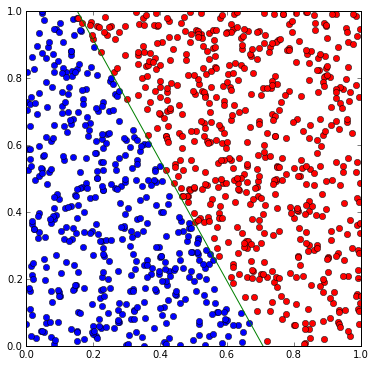

In [10]:
d,a0,a1 = w
d0 = data[labels<=0]; d1 = data[labels>0]
figure(figsize=(6,6)); ylim((0,1)); xlim((0,1))
plot(d0[:,0],d0[:,1],"bo"); plot(d1[:,0],d1[:,1],"ro"); plot([0,-d/a0],[-d/a1,0],"g")
print len(d0),len(d1)

That looks quite good, but not perfect.  Let's look at the value of the discriminant function.

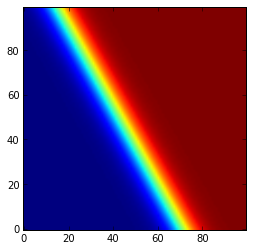

In [16]:
xs = linspace(0,1,100)[:,newaxis]
ys = linspace(0,1,100)[newaxis,:]
imshow(sigmoid(a0*xs+a1*ys+d).T,origin='lower')

Blue represents zero and red represents one.  From this picture, we can see that the transition region between the two values is quite fuzzy; the decision boundary isn't at all sharp.



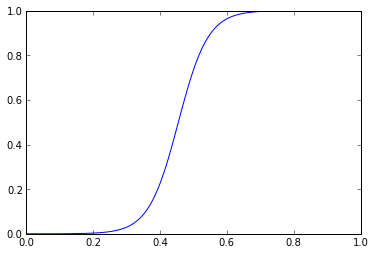

In [12]:
xs = linspace(0,1,100)
ys = xs
cla(); plot(xs,sigmoid(a0*xs+a1*ys+d)); savefig("temp.png")

Let's update a little longer and with a higher training rate.

In [20]:
eta = 0.1
for iter in range(500000):
    i = iter%len(data)
    if iter%100000==0: print iter,eta,w
    x = augmented[i]
    c = labels[i]
    s = sigmoid(dot(w,x))
    sprime = s*(1-s)
    delta = s-c
    w -= eta*(s-c)*sprime*x



0 0.1 [-40.23615769  56.53045166  31.6657019 ]
100000 0.1 [-40.38455406  56.79383207  32.0603326 ]
200000 0.1 [-40.6134952   57.1124      32.24526009]
300000 0.1 [-40.83933274  57.42943186  32.42569789]
400000 0.1 [-41.06277951  57.7431406   32.60419749]


Now the decision boundary is a lot "sharper":

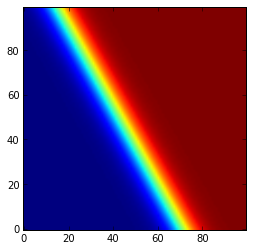

In [17]:
d,a0,a1 = w
xs = linspace(0,1,100)[:,newaxis]; ys = linspace(0,1,100)[newaxis,:]
imshow(sigmoid(a0*xs+a1*ys+d).T,origin='lower')

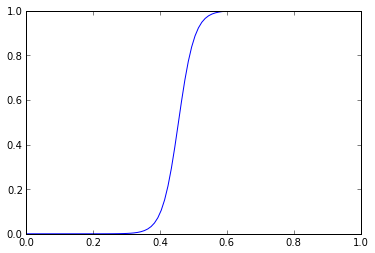

In [18]:
xs = linspace(0,1,100)
ys = xs
cla(); plot(xs,sigmoid(a0*xs+a1*ys+d))

Let's do more of that still.



In [19]:
eta = 1.0
for iter in range(500000):
    i = iter%len(data)
    if iter%100000==0: print iter,eta,w
    x = augmented[i]
    c = labels[i]
    s = sigmoid(dot(w,x))
    sprime = s*(1-s)
    delta = s-c
    w -= eta*(s-c)*sprime*x

0 1.0 [-18.92549311  26.57268748  14.97405465]
100000 1.0 [-26.38035611  37.06943269  20.67225609]
200000 1.0 [-31.05291324  43.63732416  24.36693909]
300000 1.0 [-34.65012316  48.69053925  27.22045794]
400000 1.0 [-37.64181362  52.89046892  29.59935134]


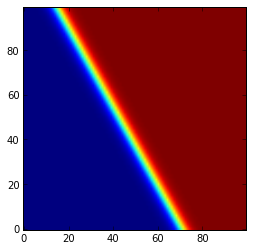

In [21]:
d,a0,a1 = w
xs = linspace(0,1,100)[:,newaxis]; ys = linspace(0,1,100)[newaxis,:]
imshow(sigmoid(a0*xs+a1*ys+d).T,origin='lower')

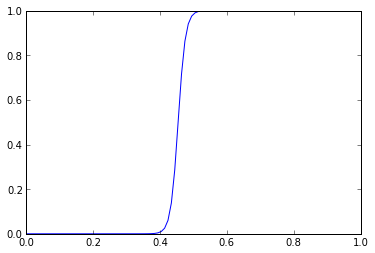

In [22]:
xs = linspace(0,1,100)
ys = xs
cla(); plot(xs,sigmoid(a0*xs+a1*ys+d)); savefig("temp.png")

# More About the Logistic Function

(log likelihood ratio)

Our justification of the logistic function above has been somewhat heuristic: we have justified it as a "smooth analog" of the Heaviside function.

The logistic function actually comes from the log likelihood ratio, used as a discriminant function:

$$ D(x) = \log\frac{P(\omega=1|x)}{P(\omega=2|x)} = \log\frac{p}{1-p} $$

(discriminant functions)

Remember from Bayesian statistics where the discriminant functions come from.

Minimum error rate classification under a 0-1 loss is given by maximizing the posterior:

$$C(x) = \arg\max_i P(\omega=i | x) $$

This maximization can be done using many different kinds of functions, including the log likelihood ratio above.

(log likelihood ratio for Gaussians)

Let's compute the discriminant function for a simple Gaussian and assume priors $p_1$, $p_2$:

$$ G_1(x) = c e^{-(x-\mu_1)^2/2} $$

$$ D(x) = \log \frac{p_1 G_1(x)/(p_1 G_1(x)+p_2 G_2(x))}{p_2 G_2(x)/(p_1 G_1(x)+p_2 G_2(x))} = \log \frac{p_1 G_1(x)}{p_2 G_2(x)}$$

(linearity of log likelihood ratio)

$$ D(x) = \log \frac{p_1 c_1 e^{(x-\mu_1)^2/2}}{p_2 c_2 e^{-(x-\mu_2)^2/2}} $$
$$ = \log C e^{-(x-\mu_1)^2/2 + (x-\mu_2)^2/2} $$
$$ = \log C e^{-\alpha - \beta x} $$
$$ = -\alpha - \beta x + C $$

(justification of logistic regression)

Look at the equation again:

$$ \log \frac{p}{1-p} = D(X) = -\alpha -\beta x + C $$

Or:

$$ p = \frac{1}{1-e^{-\alpha-\beta x}} $$

Using scikit-learn
==================

Logistic regression, like most other learning algorithms we're using, has good implementations in the `scikit.learn` Python package. Let's look at how to use that.



In [27]:
from sklearn import linear_model,datasets

All `scikit` learning algorithms start with allocating a model and optionally giving some learning parameters.



In [33]:
logreg = linear_model.LogisticRegression(C=1e5)

Next, the model is trained on the data and the labels. Data is always given as a 2D array, with rows giving the input vectors $x$. Classes are given as a 1D array of labels.



In [34]:
logreg.fit(data,labels)

LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, penalty='l2',
          tol=0.0001)

After a model has been fit, it can be used to predict labels.



In [35]:
z = logreg.predict(data)
print 1*labels[:10]
print z[:10]
print "errors",sum(z!=labels)

[1 1 0 0 0 0 1 1 0 1]
[1 1 0 0 0 0 1 1 0 1]
errors 1
